# Problem 1

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats as stats
from scipy.stats import norm as norm
plt.rcParams["figure.figsize"] = (15,10)

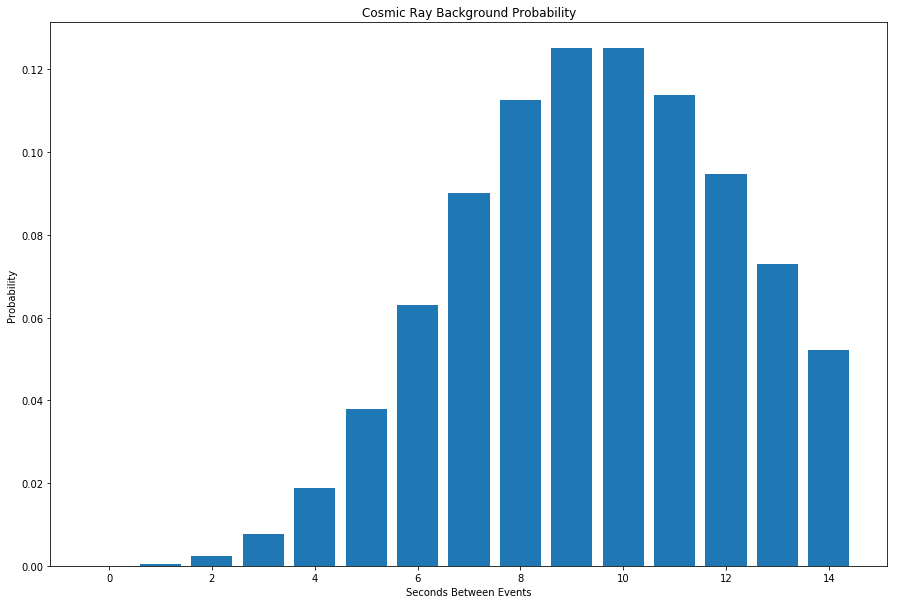

In [10]:
#A) Show how the probability distribution of the background changes as you integrate (sum) for more days.
#Average Cosmic Ray Background (X)
X = 5

#Average Number of Gamma Rays emmitted by source (Y)
Y = 10

#Array Definition
x_vals = []
y_avg = []

#populate x_vals and y_avg with appropriate index and poisson values
for index in range(15):
    x_vals.append(index)
    y_avg.append(stats.poisson.pmf(index, Y))

#Produce graph    
plt.bar(x_vals, y_avg)
plt.xlabel("Seconds Between Events")
plt.ylabel("Probability")
plt.title("Cosmic Ray Background Probability")
plt.show()

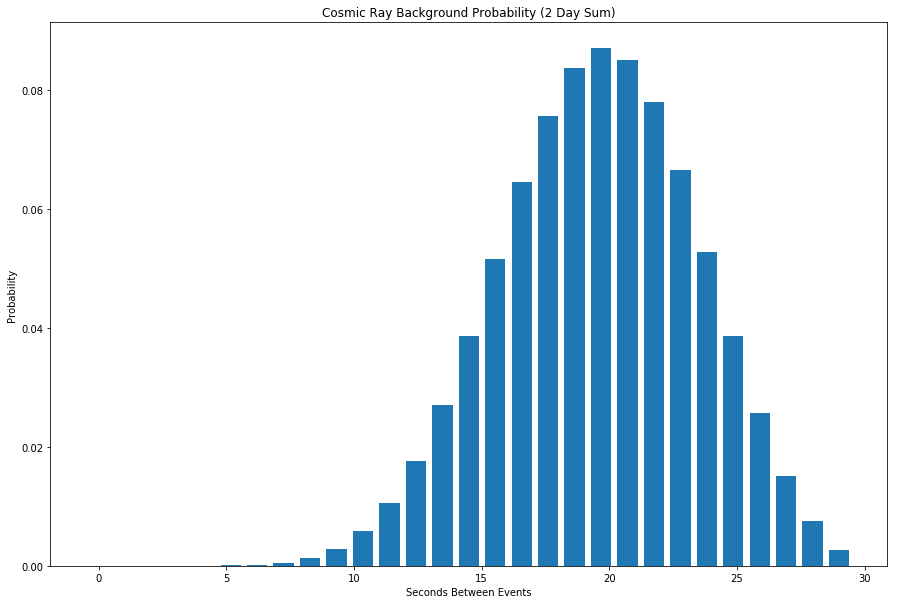

In [11]:
#Function to perform multiple convolutions
def convolve_multiple(pdf, n):
    convolve = np.convolve(pdf, pdf)
    for index in range(n-2):
        convolve = np.convolve(convolve, pdf)
    return(convolve)

bg_summation = convolve_multiple(y_avg, 1)

#Produce graph with two days worth of data
plt.bar(np.linspace(0, len(bg_summation), len(bg_summation)), bg_summation)
plt.xlabel("Seconds Between Events")
plt.ylabel("Probability")
plt.title("Cosmic Ray Background Probability (2 Day Sum)")
plt.show()

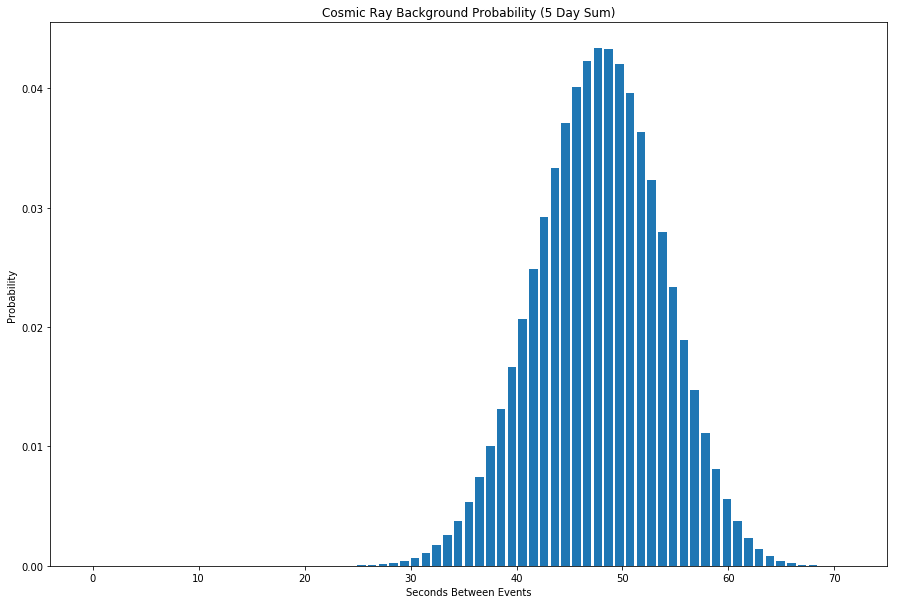

Here, the plot is still poisson, as this is the sum of several poisson distributions, which falls in line with the central limit theorem.


In [34]:
#B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. 
#Explain why this makes sense from a mathematical and conceptual point of view.
bg_summation = convolve_multiple(y_avg, 5)

#Produce graph with five days worth of data
plt.bar(np.linspace(0, len(bg_summation), len(bg_summation)), bg_summation)
plt.title("Cosmic Ray Background Probability (5 Day Sum)")
plt.xlabel("Seconds Between Events")
plt.ylabel("Probability")
plt.show()

print("Here, the plot is still poisson, as this is the sum of several poisson distributions, which falls in line with the central limit theorem.")

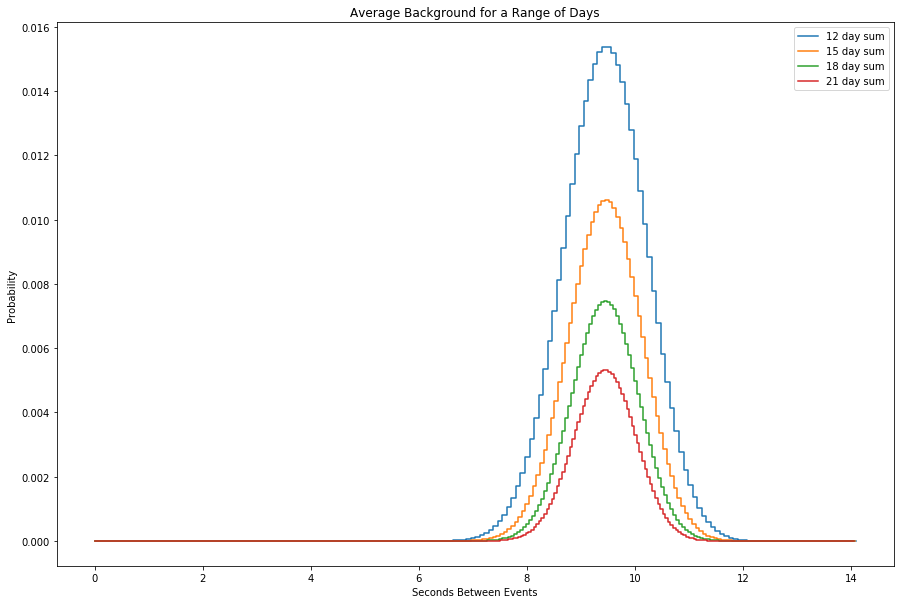

Here we can see the central limit theorem at work in the fact that all distributions have the same distribution regardless of the number of days summed, and we don't see any deviation towards any other distribution.


In [35]:
#C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, 
#and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both 
#B) and the central limit theoem.
days = [12, 15, 18, 21]
for index in range(len(days)):
    #Sums to plot
    bg_summation = convolve_multiple(y_avg, days[index])
    #Produce graph with the specified days worth of data
    plt.step(np.linspace(0, len(bg_summation), len(bg_summation))/days[index], bg_summation, label = str(days[index]) + " day sum")

plt.legend()
plt.xlabel("Seconds Between Events")
plt.ylabel("Probability")
plt.title("Average Background for a Range of Days")
plt.show()

print("Here we can see the central limit theorem at work in the fact that all distributions have the same distribution regardless of the number of days summed, and we don't see any deviation towards any other distribution.")

In [33]:
#D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your 
#observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore 
#that complication for a couple of labs.]

pdf = scipy.integrate.cumtrapz(convolve_multiple(y_avg, 1))
prob = pdf[5]
sigma = stats.norm.ppf(prob)
print("Probability of seeing 5 gamma rays after 10 days is:", prob, "associated with sigma:" , sigma)

Probability of seeing 5 gamma rays after 10 days is: 0.0001635146376155538 associated with sigma: -3.592891107575357


# Problem 2
Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.

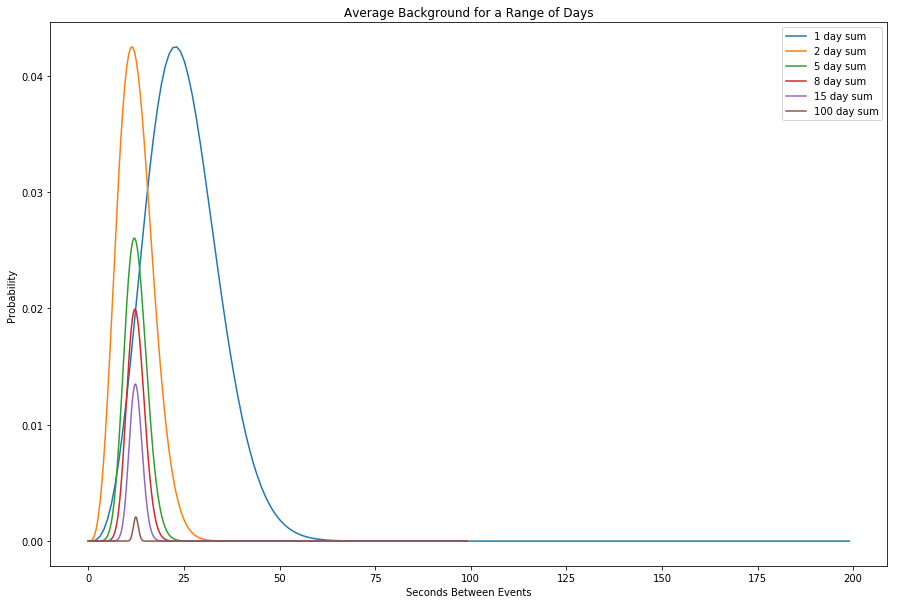

In [16]:
#A) Show how the distribution changes as you average over more observing intervals.
x = np.linspace(0, 100, 100)
bg = stats.rayleigh.pdf(x, scale = 10)

days = [1, 2, 5, 8, 15, 100]
sums = []
for index in range(len(days)):
    #Sums to plot
    sums.append(convolve_multiple(bg, days[index]))
    
for index in range(len(sums)):
    #Produce graph with the specified days worth of data
    plt.plot(np.linspace(0, len(sums[index]), len(sums[index]))/days[index], sums[index], label = str(days[index]) + " day sum")

plt.legend()
plt.title("Average Background for a Range of Days")
plt.xlabel("Seconds Between Events")
plt.ylabel("Probability")
plt.show()

C:\Users\agiedd\Anaconda2\envs\py36\lib\site-packages\matplotlib\ticker.py:1099: RuntimeWarning: divide by zero encountered in double_scalars
  coeff = np.round(x / b ** exponent)


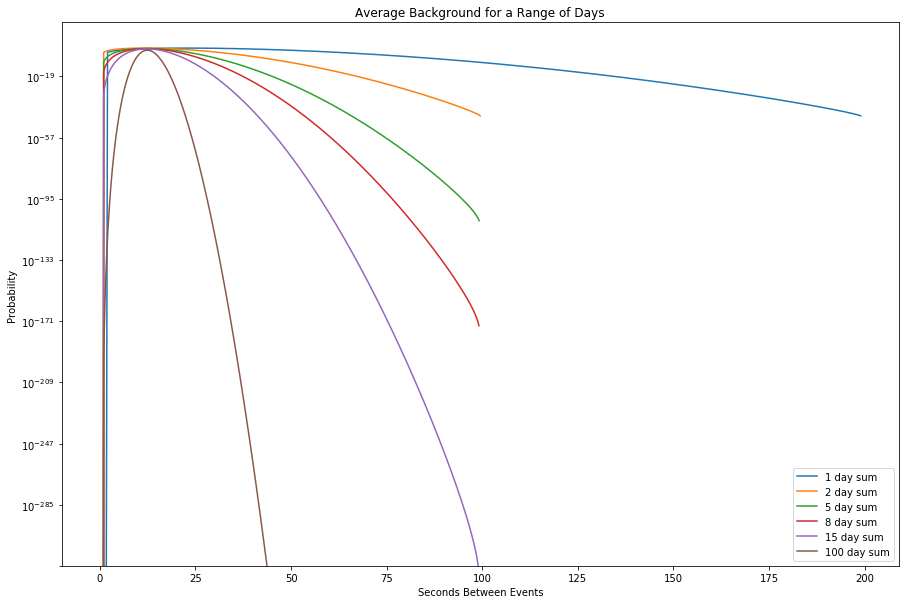

While at first glance the results appear like some variation of gaussian, we can more clearly see on the semilog plot that the distribution is very much NOT a gaussian one, and would require beyond 100 intervals to approach one.


In [17]:
#B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?
x = np.linspace(0, 100, 100)
bg = stats.rayleigh.pdf(x, scale = 10)

days = [1, 2, 5, 8, 15, 100]
sums = []
for index in range(len(days)):
    #Sums to plot
    sums.append(convolve_multiple(bg, days[index]))
    
for index in range(len(sums)):
    #Produce graph with the specified days worth of data
    plt.semilogy(np.linspace(0, len(sums[index]), len(sums[index]))/days[index], sums[index], label = str(days[index]) + " day sum")

plt.legend()
plt.title("Average Background for a Range of Days")
plt.xlabel("Seconds Between Events")
plt.ylabel("Probability")
plt.show()

#explanation
print("While at first glance the results appear like some variation of gaussian, we can more clearly see on the semilog plot that the distribution is very much NOT a gaussian one, and would require beyond 100 intervals to approach one.")

# Problem 3

In [18]:
#A) From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X 
#(pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive 
#enough to count photons so the readings are floating point brightnesses, not integer photons). 
#Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?
width = 8
signal = 12.6
x = np.linspace(-13, 13, 1000)
bg = stats.norm.pdf(x,loc = 0, scale =8)

prob = stats.norm.cdf(12.6, loc = 0, scale = width)
sigma = stats.norm.ppf(prob)

print("The probability of getting a signal of 12.6 or higher is: " , 1 - prob,"With sigma: " , sigma)
print("Therefore, a discovery cannot be claimed.")

The probability of getting a signal of 12.6 or higher is:  0.05762822227615316 With sigma:  1.575
Therefore, a discovery cannot be claimed.


What is the likelihood that the background gave me a signal as signal-like or more than the observed value?


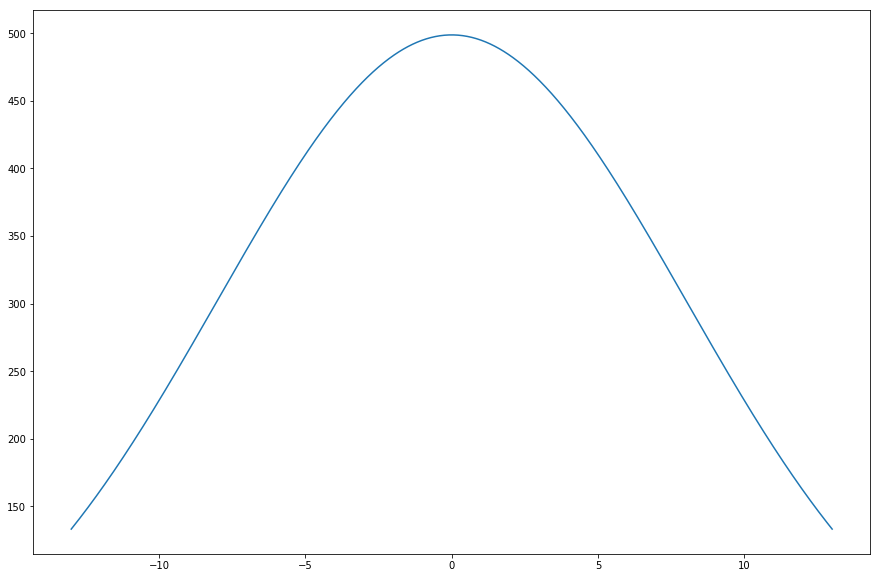

In [19]:
#B) If you have to look for a signal in 10k pixels, what is the probability distribution of your background? 
#(Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)
print("What is the likelihood that the background gave me a signal as signal-like or more than the observed value?")
plt.plot(x, bg*10000)
plt.show()

In [37]:
#C) Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), 
#calculate the significance of your detection.
probability = (1 - stats.norm.cdf(18.2, loc = 0, scale = 3))*10000
sigma = stats.norm.ppf(1 - probability)
print("Sigma value for 10k pixels at 18.2 = ", sigma, "which is not significant enough for a discovery according to the 5 sigma limit")

Sigma value for 10k pixels at 18.2 =  4.35911043308384 which is not significant enough for a discovery according to the 5 sigma limit


# Problem 4

In [27]:
#A) Calculate the signal required for a 5-sigma detection in Version 1
pixelct1 = stats.norm.cdf(5)
signal = stats.norm.ppf(pixelct1, scale=8)

print("Version 1\'s 5-sigma detection would require a signal of", signal)

#B) Calculate the signal required for a 5-sigma detection in Version 2
pixelct10k = 1 - stats.norm.cdf(5)
signal_10k = stats.norm.ppf(1 - pixelct10k/10000, scale = 8)

print("Version 2\'s 5-sigma detection would require a signal of", signal_10k)

Version 1's 5-sigma detection would require a signal of 39.99999999976141
Version 2's 5-sigma detection would require a signal of 52.40429989513324


In [30]:
#C) Discuss how much brighter the signal must be for discovery if you have a trials factor of 10k. 
#Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.
print(signal_10k/signal)
print("An increase in signal would need to be approximately 56% brighter to meet the required threshold. \nThe sensitivity penalty is low due to the scale of the results.")

1.5617614993929536
An increase in signal would need to be approximately 56% brighter to meet the required threshold. 
The sensitivity penalty is low due to the scale of the results.


In [31]:
#D) If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma 
#sensitivity threshold?
p_5 = 1 - stats.norm.cdf(5)
print("Increasing the magnitude significantly:")
for x in range(4, 8):
    factor = 10*10**x
    signal_10k = stats.norm.ppf(1 - p_5/(factor), scale = 8)
    print("Trials factor", factor, ":", signal_10k)

Increasing the magnitude significantly:
Trials factor 100000 : 55.089058023840394
Trials factor 1000000 : 57.65345148234139
Trials factor 10000000 : 60.113097115364354
Trials factor 100000000 : 62.47045997534552


If you had a different distribution shape (non-Gaussian), how would that affect the sensitivity penalty of many trials? Clearly explain.

Depending on the distribution shape, should it fall within the requirements of the central limit theorem the sensitivity penalty should be similar to what is observed in Gaussian distributions.